# Demo of Building and Using a KG in GPTs
This code block will generate the KG from the texts and save it to a .json
This block DOES NOT need to be ran every time. It will get expensive quick if you do. Only when you are creating a new KG.


/home/jyoder/miniconda3/envs/env/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Converting chunk 1/2 in test.txt
Converting chunk 2/2 in test.txt
Converting chunk 1/1 in test2.txt
Added embedding to Mark.
Added embedding to Ava.
Added embedding to TechGiant.
Added embedding to AI Assistant.
Added embedding to Bug.
Added embedding to Legacy Code.
Added embedding to Ghost Queries.
Added embedding to Phoenix.
Added embedding to Sarah Bennett.
Added embedding to HR.
Added embedding to Simulations.
Added embedding to Sarah.
Added embedding to Sarah's Office.
Added embedding to Notebook.
Added embedding to AI Advancement.
Added embedding to Humanity's Relationship with Technology.
Added embedding to TechGiant Corp.
Added embedding to Mr. Rowan.
Added embedding to Alex.
Added embedding to City of Technological Advancement.
Added embedding to Café.
Added embedding to Corporate Offices.


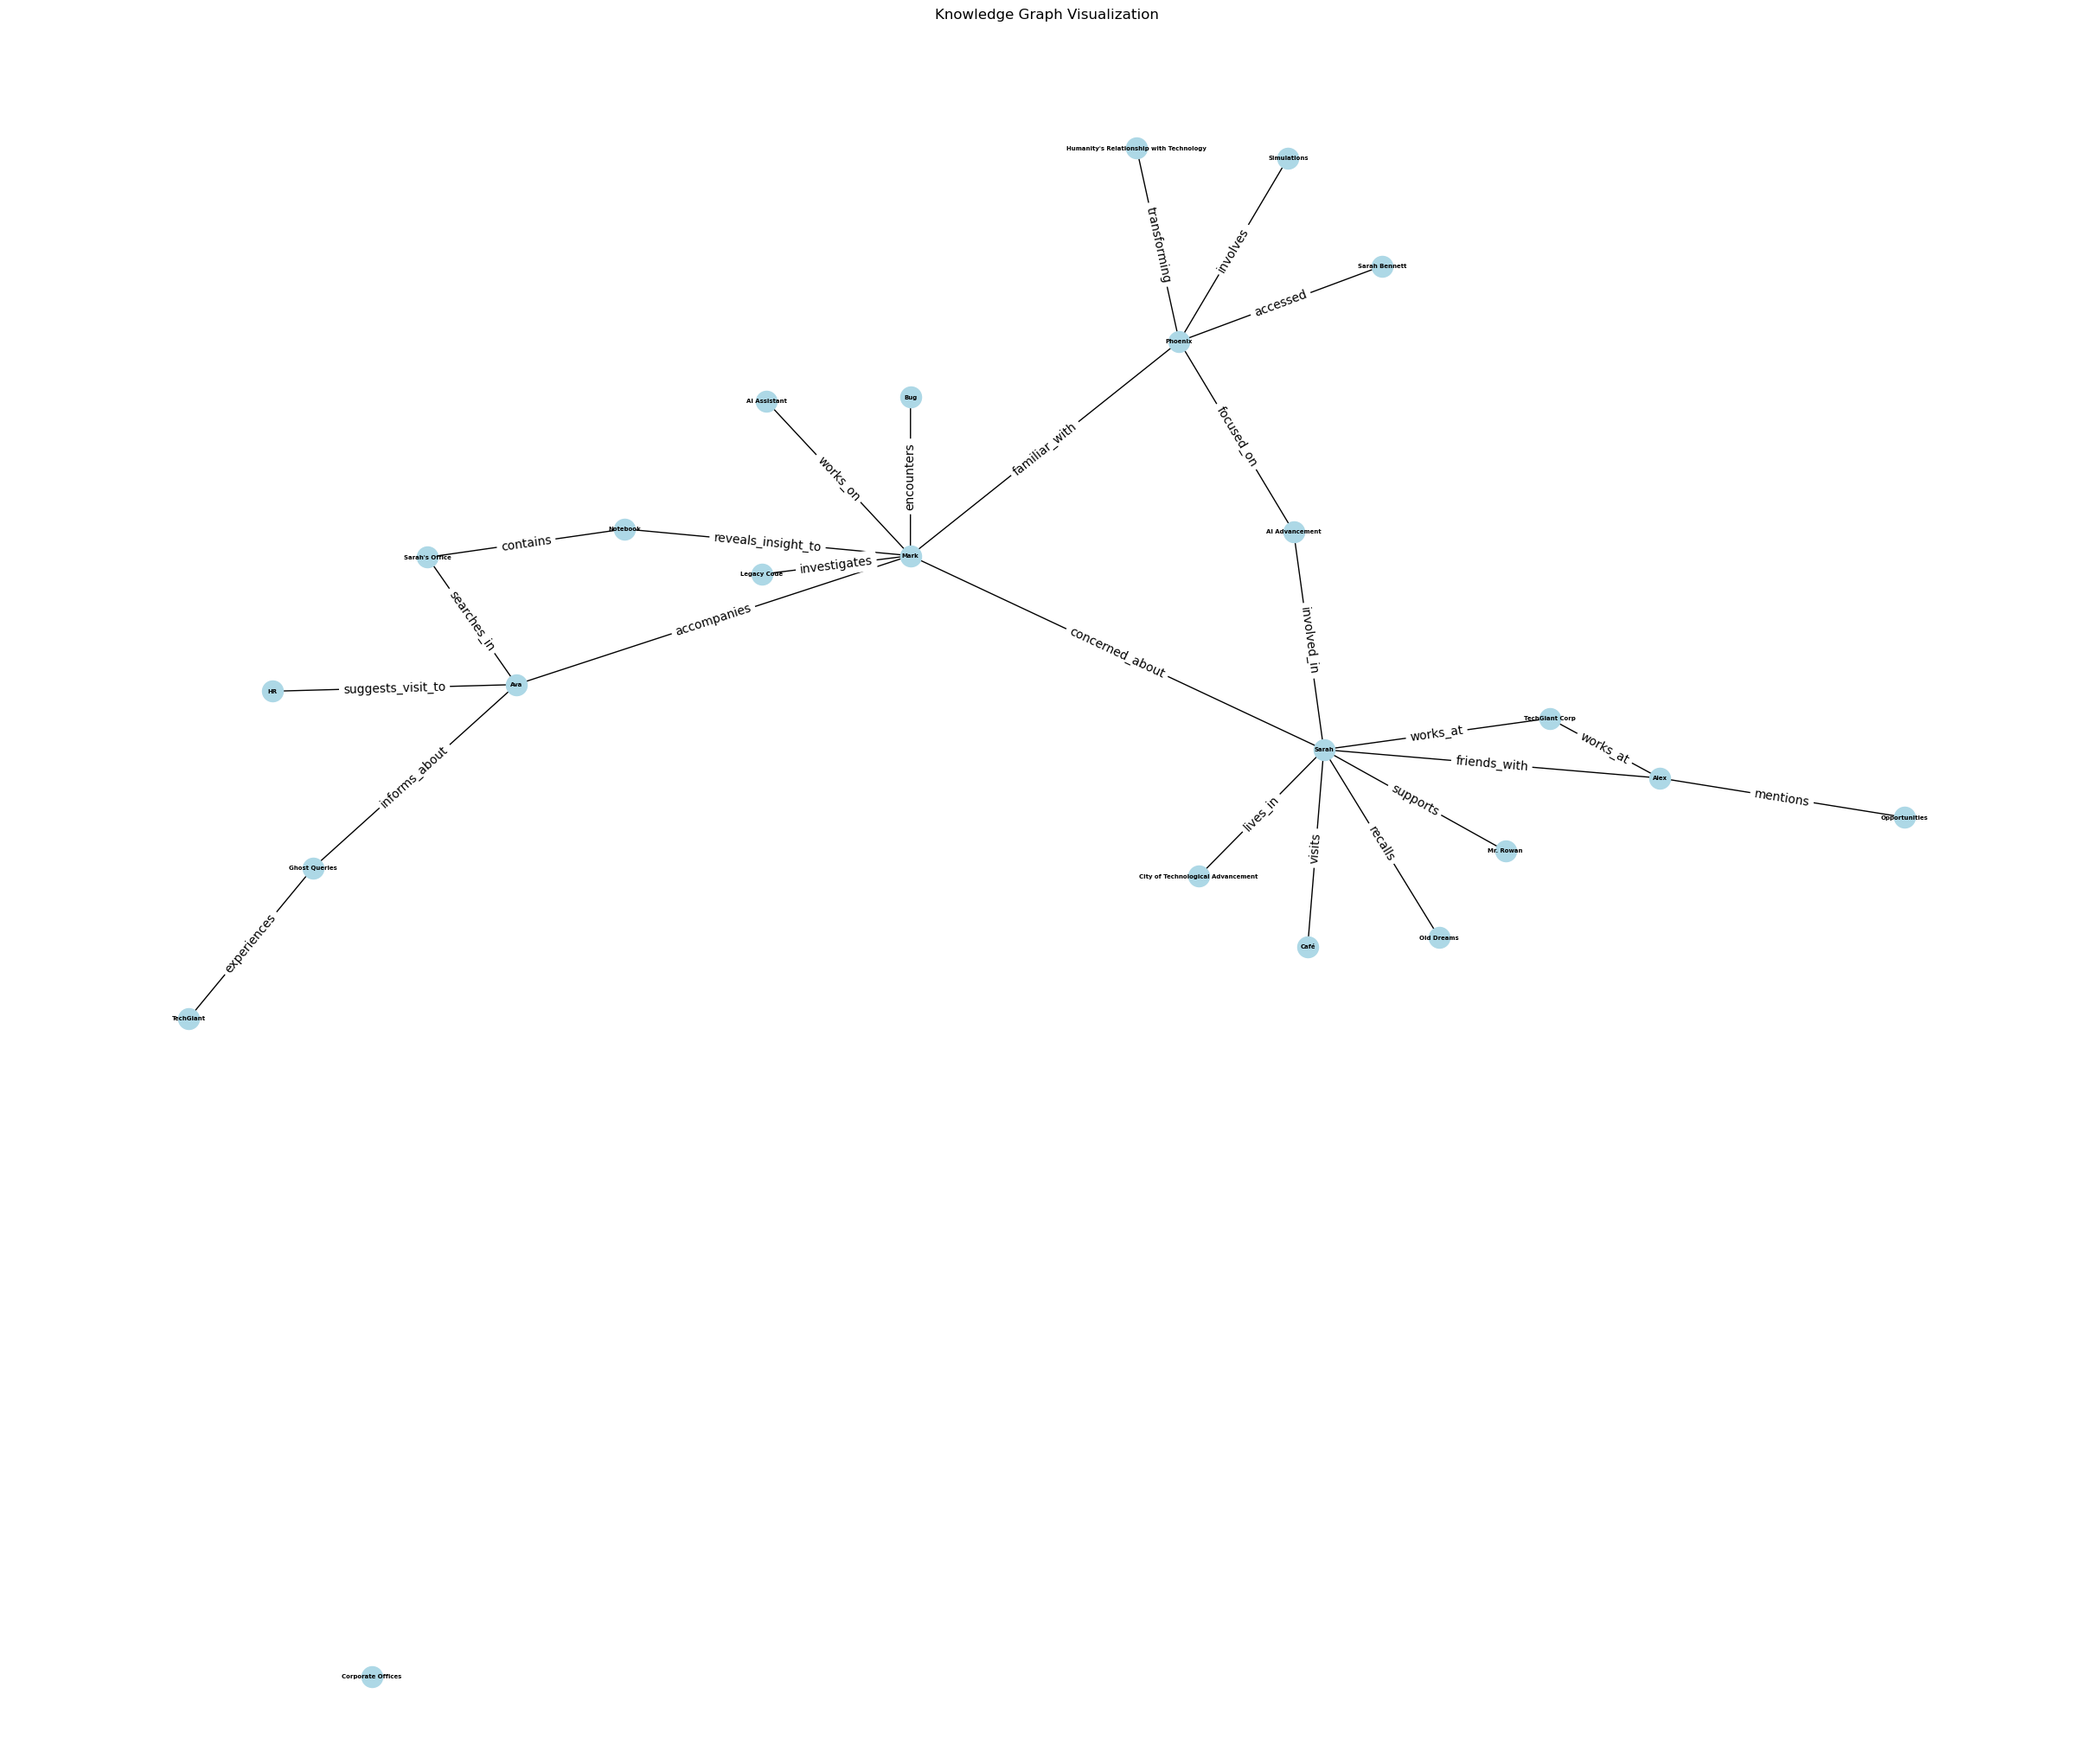

In [1]:
from kg_builder import docs_to_kg, set_api_key
import json
import os
import networkx as nx
import pickle
import matplotlib.pyplot as plt


# YOU CAN CHANGE THESE
##################################################

# This is an array of all documents you want to be put into the graph
# Works with .txt, .pdf, and .json of the format [{"image": <image name>, "description":<text description of image>}]
txt_file_paths = ["test.txt", "test2.txt"]

# This is the file you want the graph to be saved to
graph_file = "Test.json"

# This is the file where the chunked documents will be stored
pickle_file = "Test.pkl"

# This is the file where your ChatGPT apikey is stored, is should be of the form "sk-scvacct-XXXXXXXXXXXXXXX"
apikey_file = "../serviceaccount.apikey"
##################################################

# Open API key
file = open(apikey_file, 'r')
apikey = file.read().strip()
file.close()
os.environ["OPENAI_API_KEY"] = apikey
set_api_key(apikey)


# Create Graph
G, chunks = docs_to_kg(txt_file_paths, graph_file, pickle_file)

# Visualize the graph
plt.figure(figsize=(24, 20))
pos = nx.spring_layout(G, k=0.5, iterations=100)
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='bold', node_size=300, font_size=5)

# Write the relationships between nodes, gets ugly fast with large KGs
edge_labels = nx.get_edge_attributes(G, 'type')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)


plt.title("Knowledge Graph Visualization")
plt.show()


# Search and Explanation
The code block below will use the query given to search for relavent documents from the KG, and use them to generate an answer with ChatGPT. Then the same KG can be used to generate a path of reasoning between the question and answer.

In [2]:
from kg_builder import reasoning, KG_RAG, gpt_call
import json
import os
import networkx as nx
import pickle
from kg_builder import docs_to_kg


# YOU CAN CHANGE THESE
##################################################

# This is the question you want to ask ChatGPT
query = "What does Mark do?" # simple queries may not have very good explainations as they are usually just lookups in the text

# This is the file you want the graph to be saved to
graph_file = "Test.json"

# This is the file where the chunked documents will be stored
pickle_file = "Test.pkl"

# This is the file where your ChatGPT apikey is stored, is should be of the form "sk-scvacct-XXXXXXXXXXXXXXX"
apikey_file = "../serviceaccount.apikey"
##################################################


# Open API key
file = open(apikey_file, 'r')
apikey = file.read().strip()
file.close()
os.environ["OPENAI_API_KEY"] = apikey


# Open the 
with open(graph_file, 'r') as f:
    graph_data = json.load(f)
        
G = nx.node_link_graph(graph_data)

with open(pickle_file, 'rb') as file:
    chunks = pickle.load(file)

# Outputs all documents used from the most similar nodes
# Occasionally can be ALOT of documents
docs = KG_RAG(G, query, chunks)

#print(f"Documents: \n ")
#for doc in docs:
#    print(doc)
 
ans = gpt_call(query, docs[:10])

explanation, files_used, path = reasoning(G, chunks, query, ans)
print(f"Query:\n   {query}\n\nGPT Answer:\n   {ans}\n\nPath:\n   {path}\n\nExplanation:\n   {explanation}\n\nFiles Used: {files_used}")


Query:
   What does Mark do?

GPT Answer:
   Mark is a developer at TechGiant, working on optimizing processes for the company's latest AI assistant. However, he becomes suspicious about unusual activity related to the Phoenix project and decides to investigate further with the help of his colleague, Ava. They discover simulations attempting to replicate human thought patterns and find that Sarah Bennett from HR has accessed the Phoenix server. Mark decides to loop Ava in for support and plans to approach Sarah discreetly to gather more information.

Path:
   [("Sarah's Office", 'searches_in', 'Ava')]

Explanation:
   Given the context provided, Mark's initial step would be to search Sarah's office to gather clues or information that could shed light on the unusual activity related to the Phoenix project. By searching Sarah's office, Mark might come across important documents, notes, or any other evidence that could help him understand Sarah's involvement and the motives behind her acc